<a href="https://colab.research.google.com/github/ariana-caetano/python_mercado-financeiro/blob/main/Dados_PETR4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dados de PETR4**

In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 6.4 MB 10.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


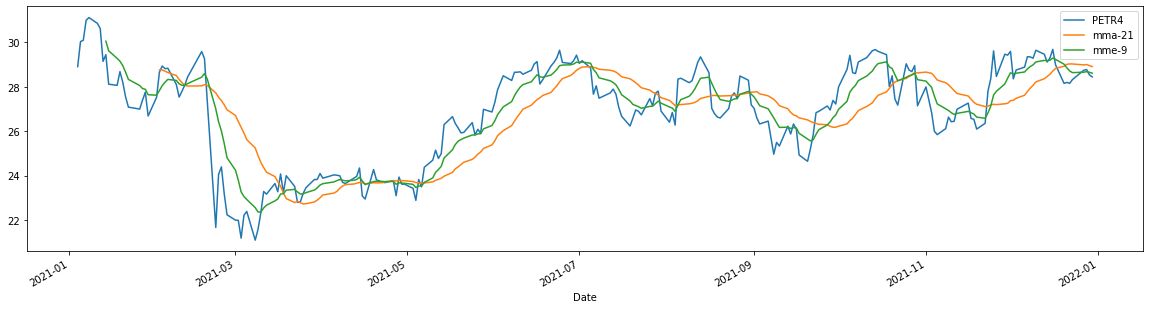

In [3]:
#importando as bibliotecas
import yfinance as yf
import matplotlib.pyplot as plt
import pandas_datareader.data as web


#este código vai consultar os dados de PETR4 no ano de 2021
#e exibirá um gráfico de linhas com os preços de fechamento do ativo
# e médias móveis de 9 exponencial e 21 aritmética


#sobrescrevendo os métodos do panda_datareader 
yf.pdr_override()

#baixando dados PETR4
#consultar os ticker no site https://finance.yahoo.com/

codigoAcao = 'PETR4.SA'
dataInicial = "2021-01-01"
dataFinal = "2021-12-31"
ativo = web.get_data_yahoo(codigoAcao, start = dataInicial, end = dataFinal)

#print(ativo.dtypes)

#tratando os dados de forma bem simples
#removendo espaços
#tudo em minúsculas
#sem acento
#regra de normalização
#existem vários outros tratamentos a serem feitos tbm nos dados e é importante sempre fazer o tratamento
ativo.columns = ativo.columns.str.replace('\s+', '_', regex=True)
ativo.columns = ativo.columns.str.lower()
ativo.columns = ativo.columns.str.replace(r'[^\w\s]+', '_', regex=True)
ativo.columns = ativo.columns.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

#calculando a média móvel de 21 períodos (fechamento)

df = ativo[["close"]]
#método rolling retorna uma janela de período n (21) e o método mean() calcula a média
df["mma21"] = df["close"].rolling(window=21).mean()

#calculando média de 9 exponencial
df["mme9"] = df["close"].ewm(span=9, min_periods=9).mean()


# Preço de fechamento
df["close"].plot(figsize=(20, 5), label="PETR4")
# Média móvel 21 dias
df["mma21"].plot(label="mma-21")
# Média móvel 9 dias
df["mme9"].plot(label="mme-9")
# Legendas
plt.legend()
plt.show()